In [56]:
import pandas as pd
import numpy as np
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv') 

In [58]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


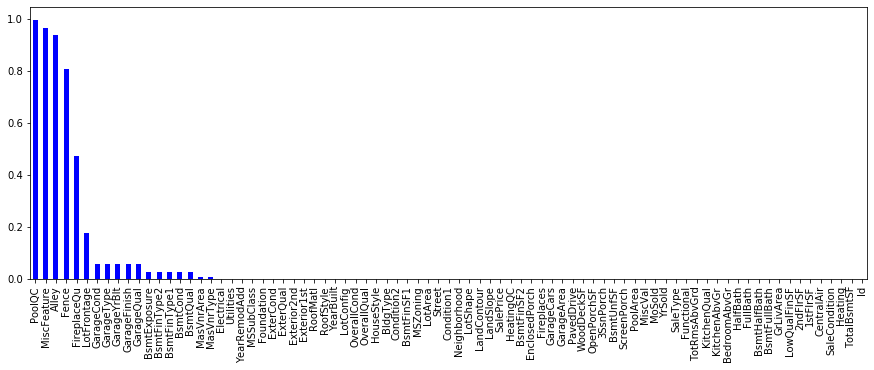

In [59]:
plt.subplots(1,1,figsize = (15,5))
train.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')

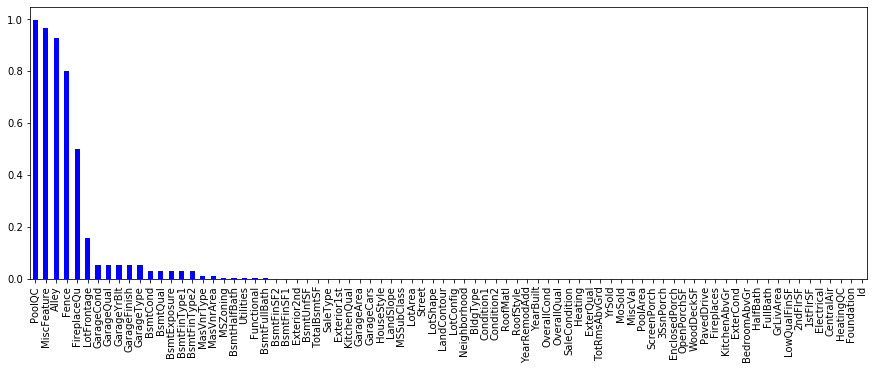

In [60]:
plt.subplots(1,1,figsize = (15,5))
test.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__UTILS__

In [62]:
def get_unique_value(df, columns_list,dtype_to_compare):
    for i in columns_list:
        if df[i].dtypes == 'object':
            print(' -', i , ":", df[i].unique())

In [63]:
train['SaleCondition'].dtypes == 'object'

True

In [64]:
get_unique_value(train,train.columns,'object')

 - MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 - Street : ['Pave' 'Grvl']
 - Alley : [nan 'Grvl' 'Pave']
 - LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
 - LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
 - Utilities : ['AllPub' 'NoSeWa']
 - LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
 - LandSlope : ['Gtl' 'Mod' 'Sev']
 - Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
 - Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
 - Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
 - BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
 - HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 - RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
 - RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdSha

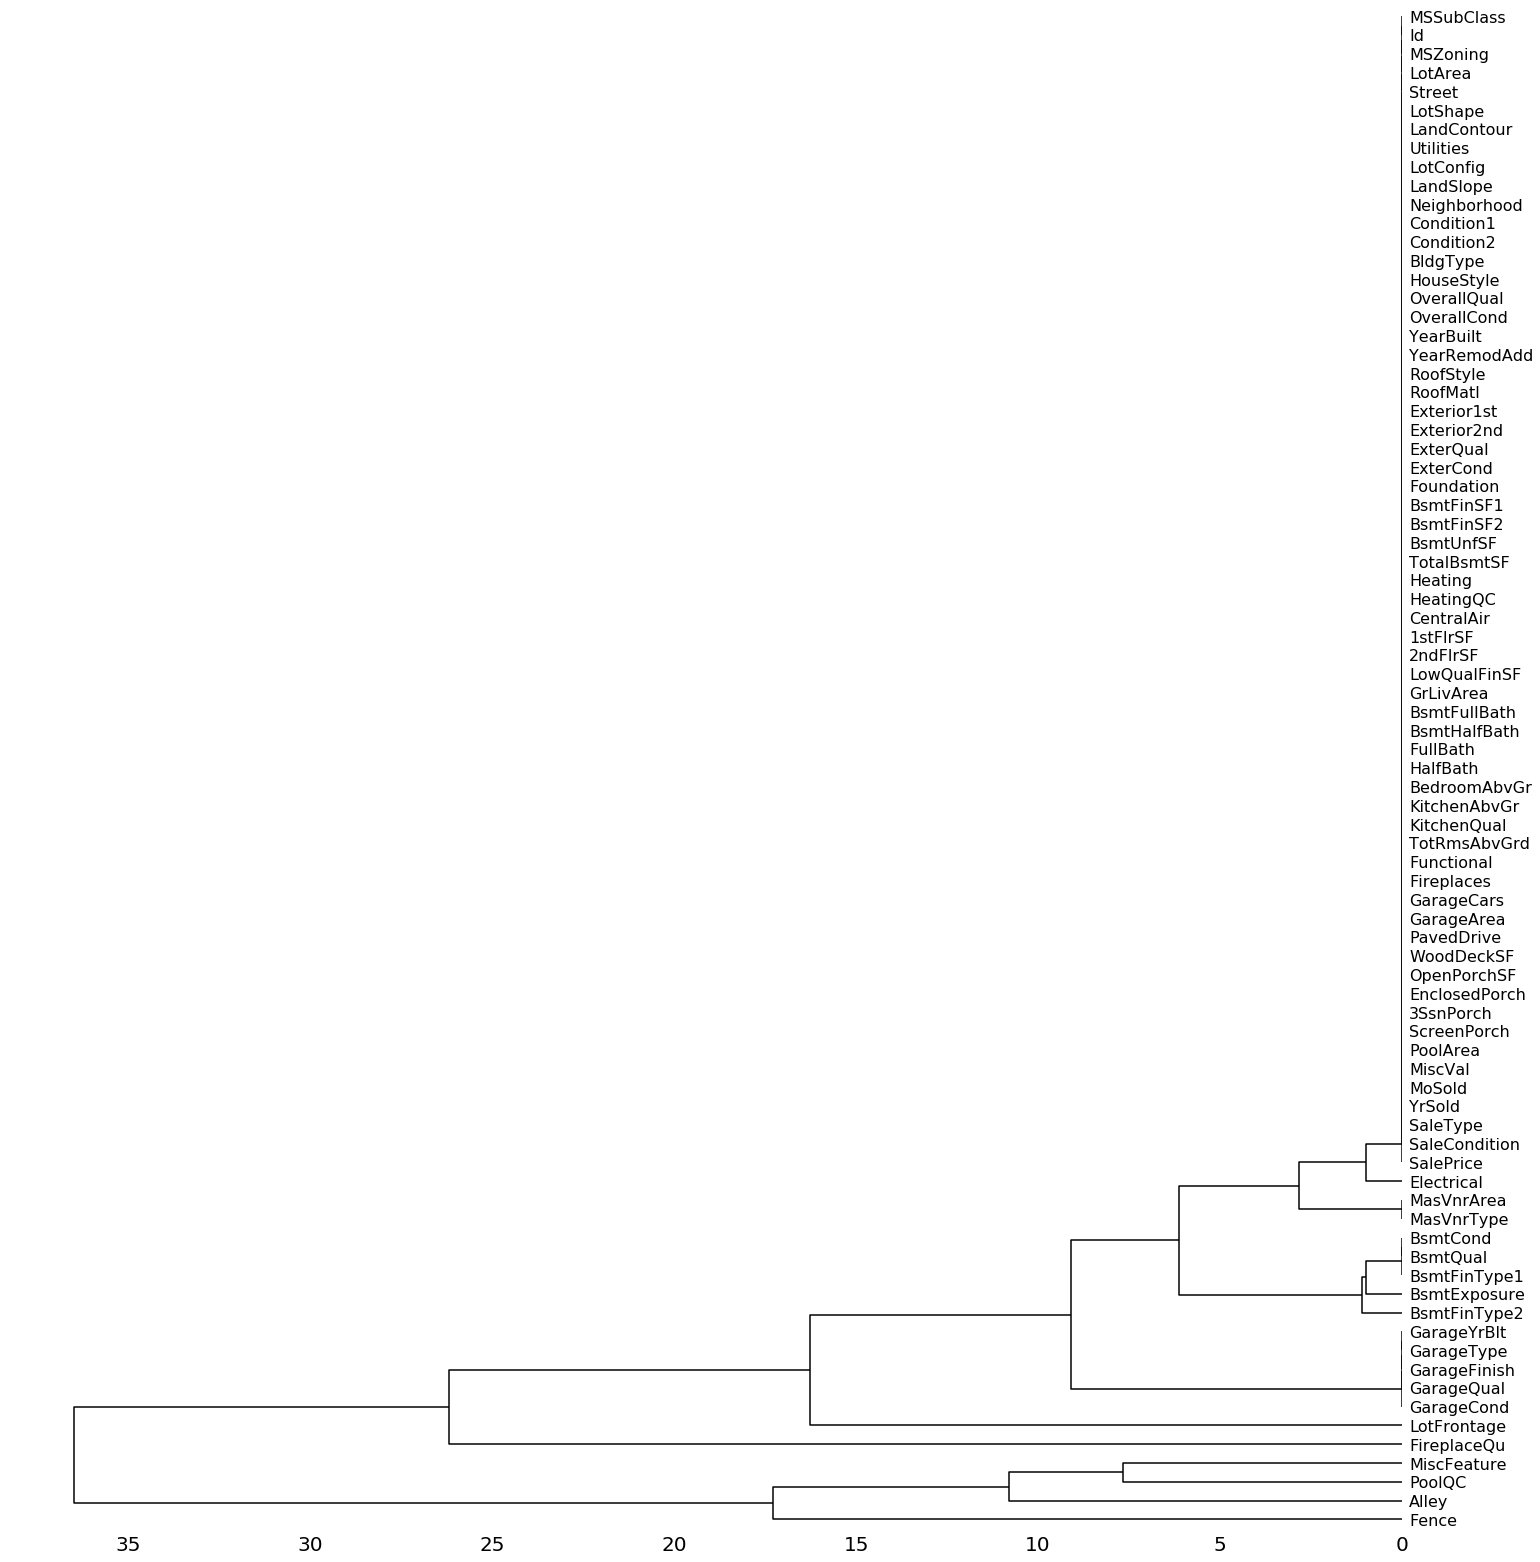

In [55]:
msno.dendrogram(train)